In [1]:
### Auto reloading moduls
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from helpFunctions import *
from generateGLV import *
from fitGLV import *
from mpl_toolkits.mplot3d import Axes3D

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/generateGLV.py:207: RuntimeWarning: overflow encountered in multiply
  return currentState*(self.growth[self.e] + np.dot(currentState,self.interactionMatrix[self.e]))


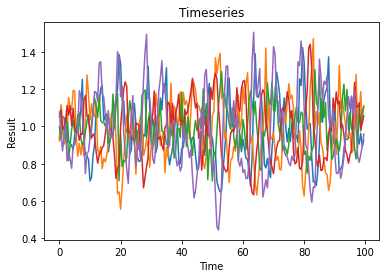

In [23]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.1
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 5
numberExperiments = 2

# Generate

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting, pertuSetting, timestep_ = 0.5)
TS.generate()
TS.plot(0)# Plot the zeroth experiment.

In [7]:
np.round(TS.beta,2)

array([[[ 0.39,  0.95,  2.5 ,  0.94,  1.26],
        [-1.11, -0.45, -0.11,  0.21, -0.17],
        [ 0.1 , -1.63,  0.2 , -0.17, -0.11],
        [ 0.05,  0.2 , -1.82, -0.23,  0.49],
        [ 0.02,  0.86, -0.59, -0.66, -0.48],
        [ 0.55,  0.08, -0.17, -0.09, -1.  ]],

       [[ 3.04,  0.61,  0.24,  0.32,  1.45],
        [-0.78,  0.5 ,  0.19,  0.07,  0.64],
        [-0.44, -1.46, -0.16,  0.62,  0.47],
        [-0.06, -0.31, -0.41, -0.07, -0.53],
        [-0.54,  0.02,  0.51, -1.29, -0.56],
        [-1.22,  0.63, -0.37,  0.35, -1.48]],

       [[ 1.13,  0.88,  0.31,  0.46, -0.58],
        [-0.26, -0.27,  0.22,  0.1 , -0.8 ],
        [-0.04, -0.71, -0.72,  0.38,  0.54],
        [-0.36,  0.02, -0.45,  0.53,  0.37],
        [-0.5 ,  0.02,  0.35, -0.78,  0.59],
        [ 0.03,  0.06,  0.3 , -0.69, -0.11]],

       [[-0.2 ,  0.63,  2.52,  0.79,  2.24],
        [-0.34, -0.24, -0.08, -0.1 , -0.14],
        [ 0.08, -0.17,  0.48, -0.02,  0.  ],
        [ 0.14,  0.44, -1.75,  0.03, -0.89],
    

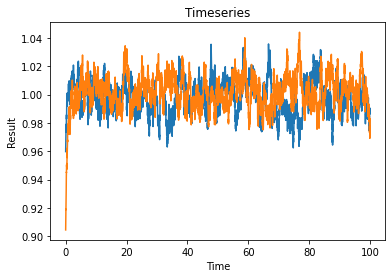

In [5]:
TS.plot(0)

--------
# Investigation why invalid matrixes can still generate the expected data. 

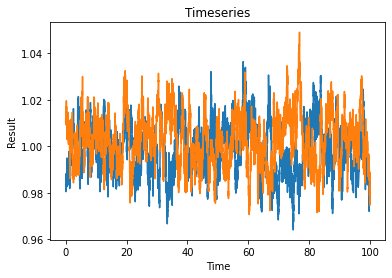

In [3]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 2
numberExperiments = 1

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()
TS.plot(0)# Plot the zeroth experiment.

In [30]:
fitObj = fitGLV(TS)
fitObj.trueMat

array([[[ 1.72074965,  2.68017964],
        [-1.50380289, -0.89417511],
        [-0.21694675, -1.78600454]]])

In [8]:
TS.beta

array([[[ 2.397978  ,  2.00295129],
        [-1.50380289, -0.89417511],
        [-0.21694675, -1.78600454]]])

In [14]:
InterMat = TS.interactionMatrix[0]

In [11]:
steady = np.array([1,1])

In [16]:
growth = TS.growth[0]

In [17]:
steady * growth + steady * np.dot(InterMat,steady)

array([0., 0.])

In [19]:
steady@InterMat

array([-1.72074965, -2.68017964])

In [23]:
TS.steadystate

array([1., 1.])

In [24]:
InterMat@steady

array([-2.397978  , -2.00295129])

In [26]:
steady@InterMat

array([-1.72074965, -2.68017964])

In [ ]:
-1.50380

-------------
Great now lets implement the good inference with pertubation.

In [36]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 10,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 2
numberExperiments = 1

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()

(1, 9990, 2)
(1, 9990, 3)


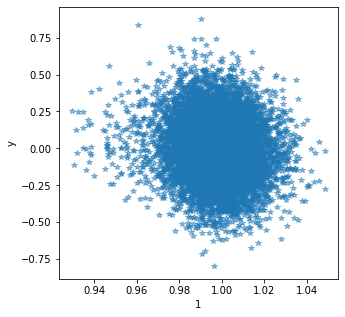

In [40]:
fitObj = fitGLV(TS)
plot2DScatter(fitObj.Y,fitObj.X,xaxis="1",yaxis="y")
print(fitObj.Y.shape)
print(fitObj.X.shape)

You see this is the effect if we do not exclude the wrong Y entries.

In [11]:
np.all(np.zeros(4)==0)

True

In [10]:
np.zeros(4)==1

array([False, False, False, False])

In [16]:
np.where(TS.hasPertuberd)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 999, 1999, 2999, 3999, 4999, 5999, 6999, 7999, 8999]))

In [18]:
save = np.random.rand(3,4)
save

array([[0.78858913, 0.41071617, 0.79593148, 0.59876565],
       [0.00385421, 0.14339409, 0.86693316, 0.67121937],
       [0.30198136, 0.76892117, 0.52320695, 0.35695767]])

In [22]:
bool = np.array([[False,True,False,True],[False,True,False,True],[False,True,False,True]])
save[bool]

array([0.41071617, 0.59876565, 0.14339409, 0.67121937, 0.76892117,
       0.35695767])

In [32]:
testBool = np.array([False,True,False,True])

In [33]:
save[:,~testBool]

array([[0.78858913, 0.79593148],
       [0.00385421, 0.86693316],
       [0.30198136, 0.52320695]])

In [42]:
fitObj.trueMat

array([[[ 1.72074965,  2.68017964],
        [-1.50380289, -0.89417511],
        [-0.21694675, -1.78600454]]])

-----
Why zero interaction explodes?

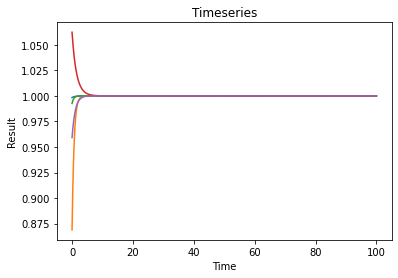

In [48]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.00001
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 0}

numberSpecies = 5
numberExperiments = 100

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()
TS.plot(0)

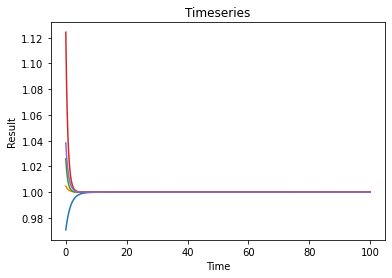

In [51]:
TS.plot(7)